In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Carregar arquivo

df = pd.read_csv('/home/cordoeira/Downloads/votacao_secao_2020_RJ/votacao_secao_2020_RJ.csv', encoding="utf-8", sep = ',')

# Dicionário de Partidos
partidos = {
    '10': 'PRB',    # Partido Republicano Brasileiro
    '11': 'PP',     # Progressistas
    '12': 'PDT',    # Partido Democrático Trabalhista
    '13': 'PT',     # Partido dos Trabalhadores
    '14': 'PTB',    # Partido Trabalhista Brasileiro
    '15': 'MDB',    # Movimento Democrático Brasileiro
    '16': 'PSTU',   # Partido Socialista dos Trabalhadores Unificado
    '17': 'PSL',    # Partido Social Liberal
    '18': 'REDE',   # Rede Sustentabilidade
    '19': 'PODE',   # Podemos
    '20': 'PSC',    # Partido Social Cristão
    '21': 'PCB',    # Partido Comunista Brasileiro
    '22': 'PL',     # Partido Liberal
    '23': 'CIDADANIA',  # Cidadania
    '25': 'DEM',    # Democratas
    '27': 'DC',     # Democracia Cristã
    '28': 'PRTB',   # Partido Renovador Trabalhista Brasileiro
    '29': 'PMN',    # Partido da Mobilização Nacional
    '30': 'NOVO',   # Partido Novo
    '31': 'PHS',    # Partido Humanista da Solidariedade
    '33': 'PMB',    # Partido da Mulher Brasileira
    '35': 'PMN',    # Partido da Mobilização Nacional
    '36': 'PTC',    # Partido Trabalhista Cristão
    '40': 'PSB',    # Partido Socialista Brasileiro
    '43': 'PV',     # Partido Verde
    '44': 'PRP',    # Partido Republicano Progressista
    '45': 'PSDB',   # Partido da Social Democracia Brasileira
    '50': 'PSOL',   # Partido Socialismo e Liberdade
    '51': 'PATRI',  # Patriota
    '54': 'PPL',    # Partido Pátria Livre
    '55': 'PSD',    # Partido Social Democrático
    '65': 'PCdoB',  # Partido Comunista do Brasil
    '70': 'AVANTE', # Avante
    '77': 'SOLIDARIEDADE',  # Solidariedade
    '80': 'UP',     # Unidade Popular pelo Socialismo
    '90': 'NULO'
}

# Dicionário de Orientações de cada partido. Isso pode gerar polêmica
orientacao_partidos = {
    'PT': 'Esquerda',
    'PSOL': 'Esquerda',
    'PCdoB': 'Esquerda',
    'PSTU': 'Esquerda',
    'PCB': 'Esquerda', 
    'PSB': 'Esquerda',
    'REDE': 'Esquerda',
    'PV': 'Esquerda',
    'UP': 'Esquerda',
    'PRB': 'Direita',
    'PP': 'Direita',
    'PSL': 'Direita',
    'PODE': 'Direita',
    'PL': 'Direita', 
    'CIDADANIA': 'Direita',
    'PATRI': 'Direita',
    'PRTB': 'Direita',
    'PSC': 'Direita', 
    'DEM': 'Direita',
    'DC': 'Direita',
    'NOVO': 'Direita',
    'PHS': 'Direita',
    'PMN': 'Direita',
    'PTB': 'Direita',
    'MDB': 'Direita',
    'PSD': 'Direita',
    'PSDB': 'Direita'
}



In [6]:
# DataFrames para análises preliminares e posteriores

df_nova_friburgo = df[df['NM_MUNICIPIO']== 'NOVA FRIBURGO']
df_nova_friburgo_prefeito = df[(df['NM_MUNICIPIO'] == 'NOVA FRIBURGO') & (df['DS_CARGO'] == 'Prefeito')]

candidatos_friburgo = df_nova_friburgo.groupby('NM_VOTAVEL')['QT_VOTOS'].sum().reset_index()
candidatos_prefeito_friburgo = df_nova_friburgo_prefeito.groupby('NM_VOTAVEL')['QT_VOTOS'].sum().reset_index()

candidatos_friburgo = candidatos_friburgo.sort_values(by='QT_VOTOS', ascending=False)
prefeitos_friburgo = candidatos_prefeito_friburgo.sort_values(by='QT_VOTOS', ascending=False)

df_nova_friburgo['Partido'] = df_nova_friburgo['NR_VOTAVEL'].astype(str).str[:2]
votos_por__codigo_partido = df_nova_friburgo.groupby(['NR_SECAO', 'Partido'])['QT_VOTOS'].sum().reset_index()


df_nova_friburgo['Nome do Partido'] = df_nova_friburgo['Partido'].map(partidos)
df_nova_friburgo['Orientação'] = df_nova_friburgo['Nome do Partido'].map(orientacao_partidos)

votos_por_partido = df_nova_friburgo.groupby(['NR_SECAO', 'Nome do Partido', 'Orientação'])['QT_VOTOS'].sum().reset_index()

secao_friburgo = votos_por_partido['NR_SECAO'].unique()


/tmp/ipykernel_13604/1242469209.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nova_friburgo['Partido'] = df_nova_friburgo['NR_VOTAVEL'].astype(str).str[:2]
/tmp/ipykernel_13604/1242469209.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nova_friburgo['Nome do Partido'] = df_nova_friburgo['Partido'].map(partidos)
/tmp/ipykernel_13604/1242469209.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

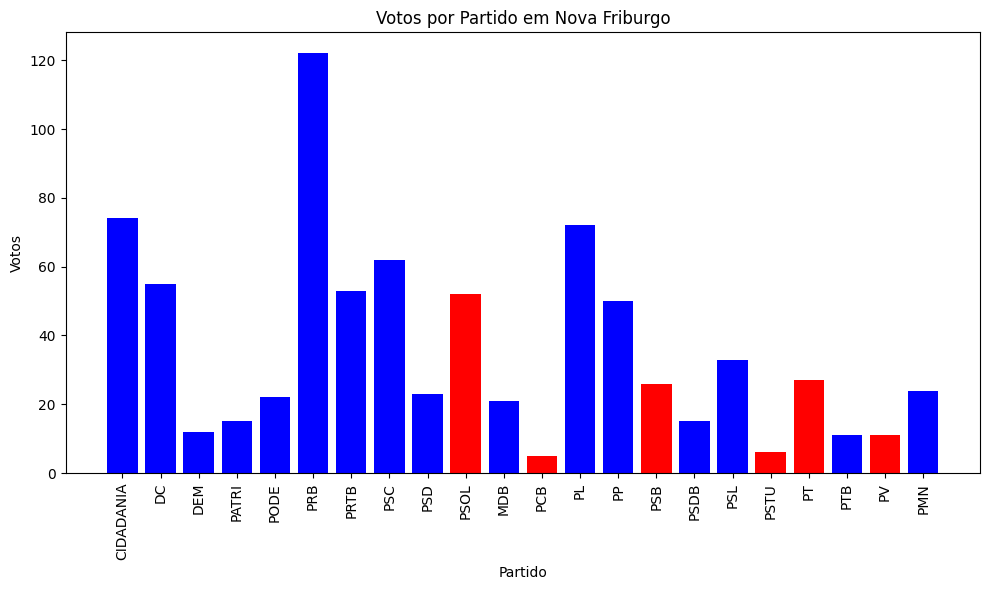

In [7]:
cores = ['red' if orientacao == 'Esquerda' else 'blue' for orientacao in votos_por_partido['Orientação']]

#votos_por_partido = votos_por_partido.sort_values(by='QT_VOTOS', ascending=False)

plt.figure(figsize=(10,6))
plt.bar(votos_por_partido['Nome do Partido'], votos_por_partido['QT_VOTOS'], color=cores)

plt.xlabel('Partido')
plt.ylabel('Votos')
plt.title('Votos por Partido em Nova Friburgo')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

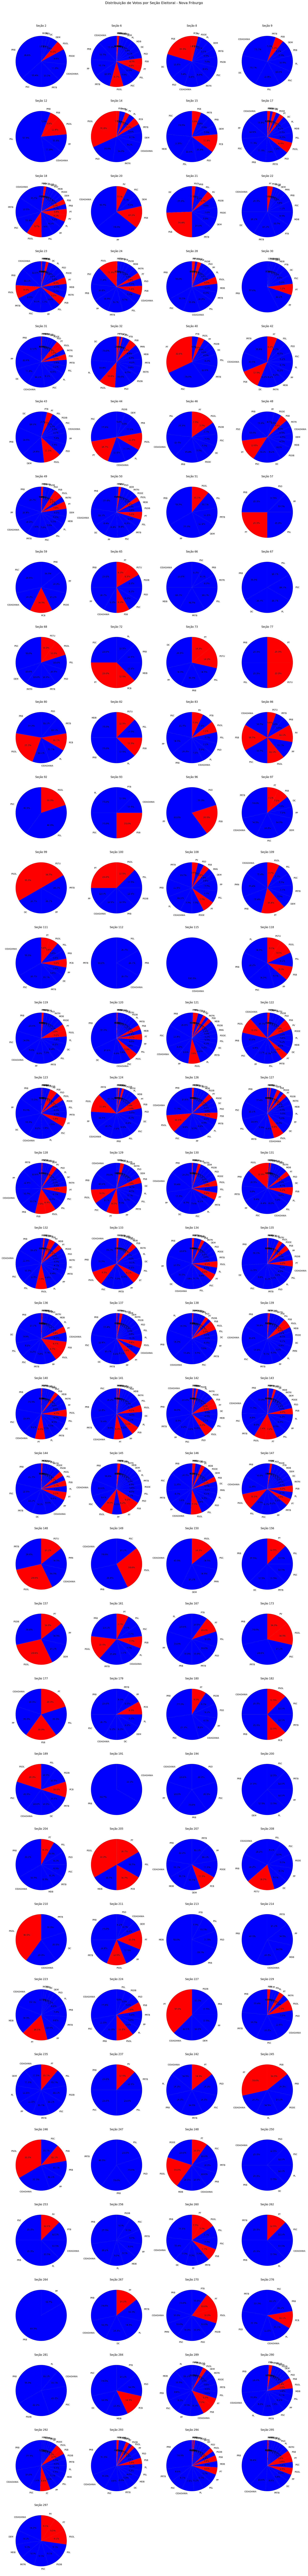

In [8]:
total_secoes = len(secao_friburgo)

colunas = 4
linhas = int(np.ceil(total_secoes/colunas))

fig, axs = plt.subplots(linhas, colunas, figsize=(colunas*5,linhas*5))
axs = axs.ravel()

for idx, secao in enumerate(secao_friburgo):

    df_secao = votos_por_partido[votos_por_partido['NR_SECAO'] == secao]
    df_secao = df_secao.sort_values(by='QT_VOTOS', ascending=False)

    cores = ['red' if orientacao == 'Esquerda' else 'blue' for orientacao  in df_secao['Orientação']]
    partidos = df_secao['Nome do Partido']
    votos = df_secao['QT_VOTOS']

    axs[idx].pie(votos, labels=partidos, startangle=90, autopct="%1.1f%%" , colors=cores)
    axs[idx].set_title(f'Seção {secao}')
    axs[idx].axis('equal')

for i in range(idx + 1, len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.suptitle('Distribuição de Votos por Seção Eleitoral - Nova Friburgo', fontsize=16)
plt.subplots_adjust(top=0.97)
plt.show()